<a href="https://colab.research.google.com/github/pankaj18/forecasting/blob/main/predicting_walmart_sales_using_profet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from fbprophet import Prophet
pd.set_option('display.max_columns',80)
%matplotlib inline

In [14]:
path="drive/MyDrive/competitions/forecasting/walmart_sales_prediction/data"

In [15]:
features=pd.read_csv(path+'/features.csv')
stores=pd.read_csv(path+'/stores.csv')
train=pd.read_csv(path+'/train.csv')
test=pd.read_csv(path+'/test.csv')

In [28]:
print(features.shape)
features.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# Fill missing values

In [31]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [38]:
features['MarkDown1']=features['MarkDown1'].fillna(0)
features['MarkDown2']=features['MarkDown2'].fillna(0)
features['MarkDown3']=features['MarkDown3'].fillna(0)
features['MarkDown4']=features['MarkDown4'].fillna(0)
features['MarkDown5']=features['MarkDown5'].fillna(0)
features['CPI']=features['CPI'].fillna(features['CPI'].mean())
features['Unemployment']=features['Unemployment'].fillna(features['Unemployment'].mean())

In [40]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [29]:
print(stores.shape)
stores.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [30]:
print(train.shape)
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# merging all features with training data

In [41]:
train_data=pd.merge(features,train,on=['Store','Date','IsHoliday'],how='inner')
train_data=pd.merge(train_data,stores,how='inner',on=['Store'])

In [42]:
train_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [43]:
#sort values in train_data1 using date

In [44]:
train_data=train_data.sort_values(by='Date').reset_index(drop=True)

In [66]:
np.unique(train_data['Store'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [62]:
np.unique(train_data['Dept'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [65]:
count=0
for i in range(1,46):
  for j in range(1,100):
    shape=train_data[(train_data['Store']==i) & (train_data['Dept']==j)].shape
    if shape[0]==0:
      #print(f"i:{i},j{j}")
      count+=1
    else:
      #print(f"i:{i},j:{j},shape:{shape}") 
      pass
print(count)

1124


# profet model for store1 and dept1

In [69]:
store1_dept1=train_data[(train_data['Store']==1) & (train_data['Dept']==1)].reset_index(drop=True)

In [127]:
holiday_df=store1_dept1[['Date','IsHoliday']].replace({True:"Yes",False:"No"})
holiday_df.columns=['ds','holiday']
holiday_df.head()

,ds,holiday
0,2010-02-05,No
1,2010-02-12,Yes
2,2010-02-19,No
3,2010-02-26,No
4,2010-03-05,No


In [95]:
store1_dept1_df=store1_dept1[['Date','Weekly_Sales']]
store1_dept1_df.columns=['ds','y']
store1_dept1_df.head()

,ds,y
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [129]:
model=Prophet()

In [130]:
model.fit(store1_dept1_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [134]:
future=model.make_future_dataframe(12,freq="W")

In [135]:
forecast=model.predict(future)

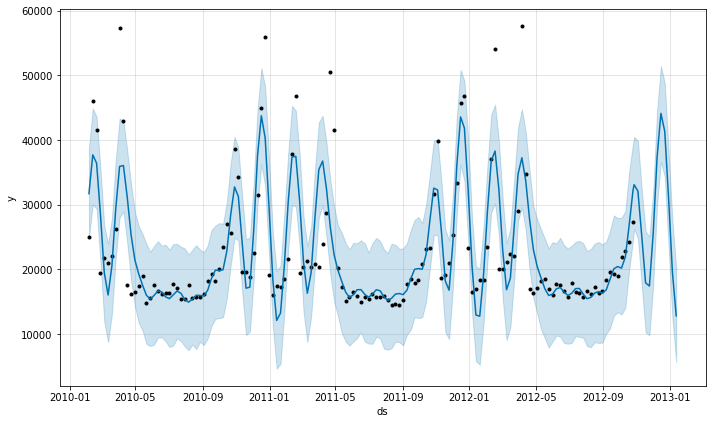

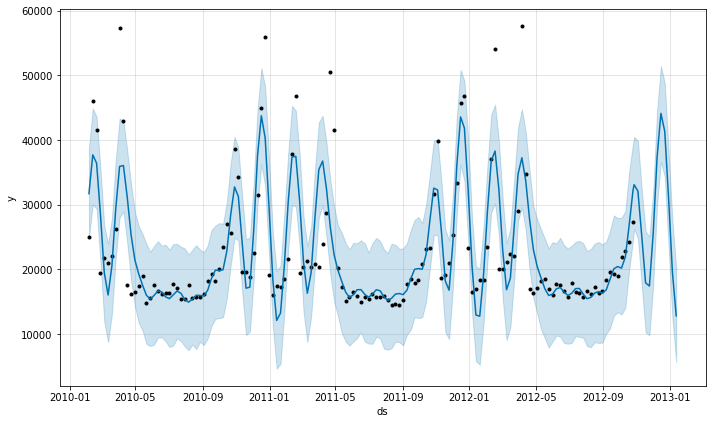

In [136]:
model.plot(forecast)

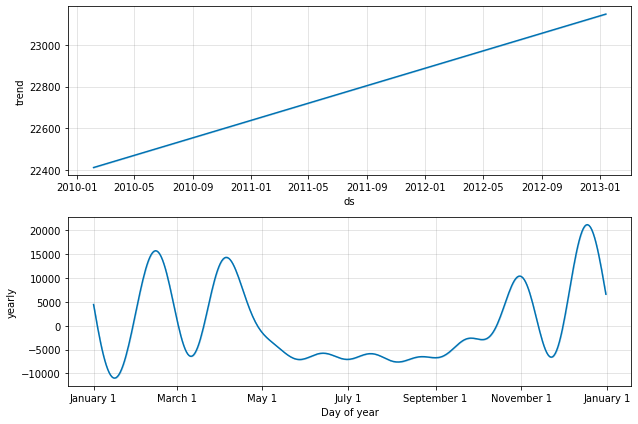

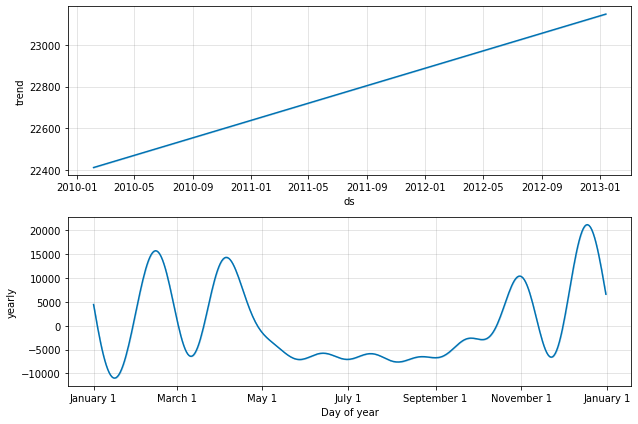

In [138]:
model.plot_components(forecast)

# model using holiday information

In [141]:
model1=Prophet(holidays=holiday_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


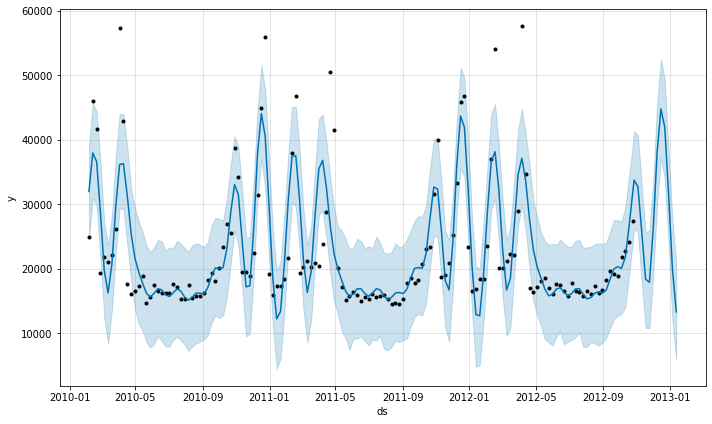

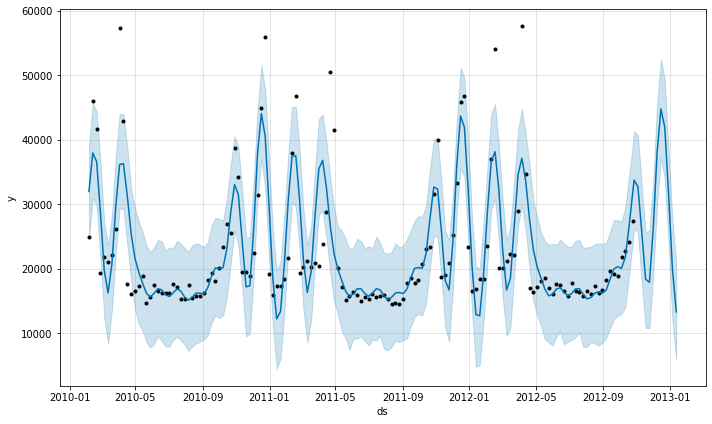

In [142]:
model1.fit(store1_dept1_df)
future=model1.make_future_dataframe(12,freq="W")
forecast=model1.predict(future)
model1.plot(forecast)

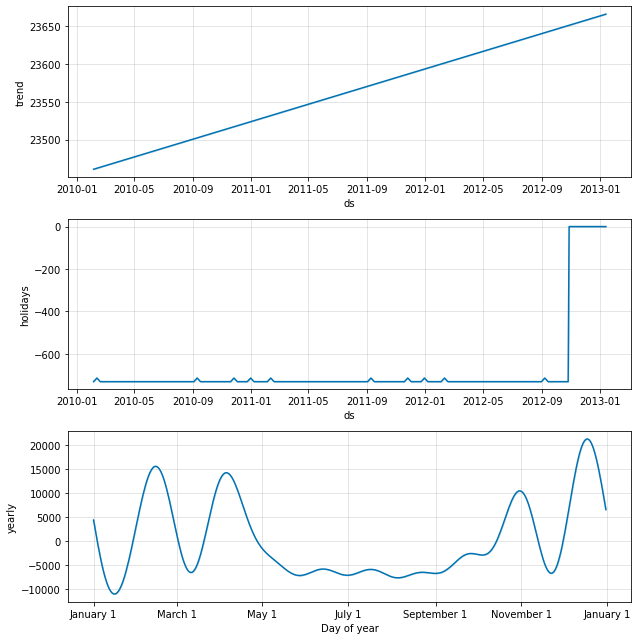

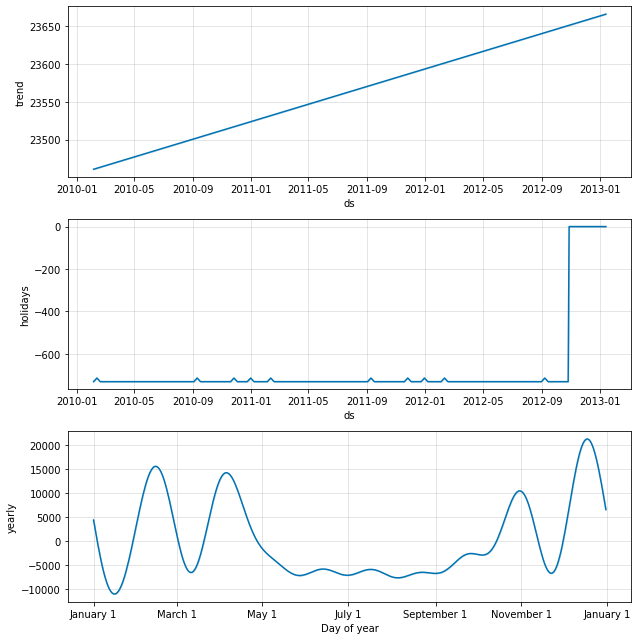

In [143]:
model1.plot_components(forecast)

Model using other variables

In [144]:
store1_dept1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,1,46039.49,A,151315
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,1,41595.55,A,151315
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,1,19403.54,A,151315
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,1,21827.90,A,151315


In [148]:
store1_dept1_df1=store1_dept1[['Date','Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]
store1_dept1_df1.columns=['ds','y','Temperature','Fuel_Price','CPI','Unemployment']
store1_dept1_df1.head()

,ds,y,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,24924.50,42.31,2.572,211.096358,8.106
1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106
2,2010-02-19,41595.55,39.93,2.514,211.289143,8.106
3,2010-02-26,19403.54,46.63,2.561,211.319643,8.106
4,2010-03-05,21827.90,46.50,2.625,211.350143,8.106


In [153]:
model2=Prophet(holidays=holiday_df)
model2.add_regressor('Temperature')
model2.add_regressor('Fuel_Price')
model2.add_regressor('CPI')
model2.add_regressor('Unemployment')
model2.fit(store1_dept1_df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


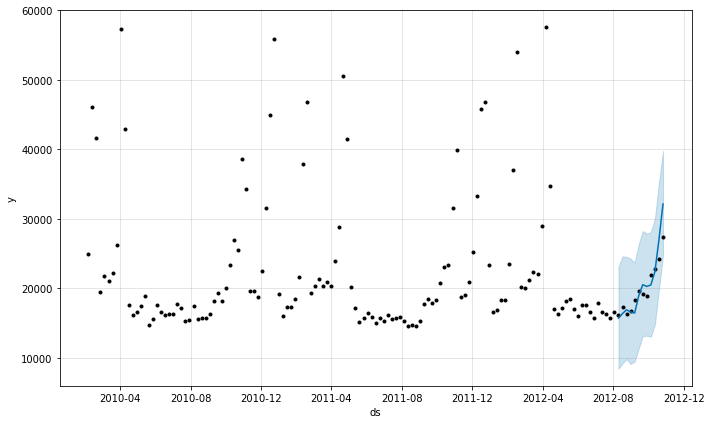

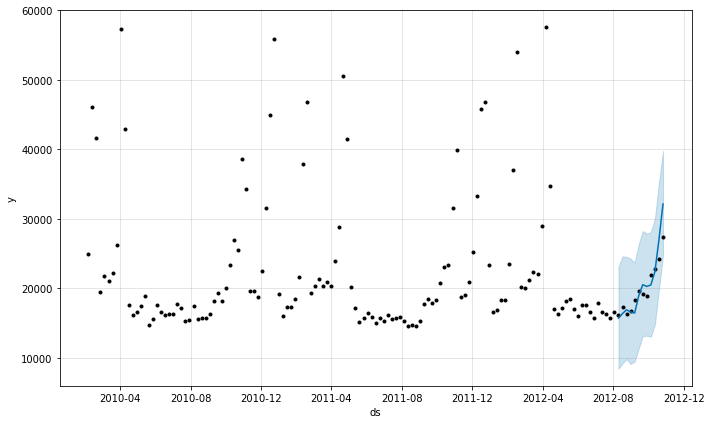

In [155]:
future=store1_dept1_df1.drop('y',axis=1)[-12:]
forecast=model2.predict(future)
model2.plot(forecast)

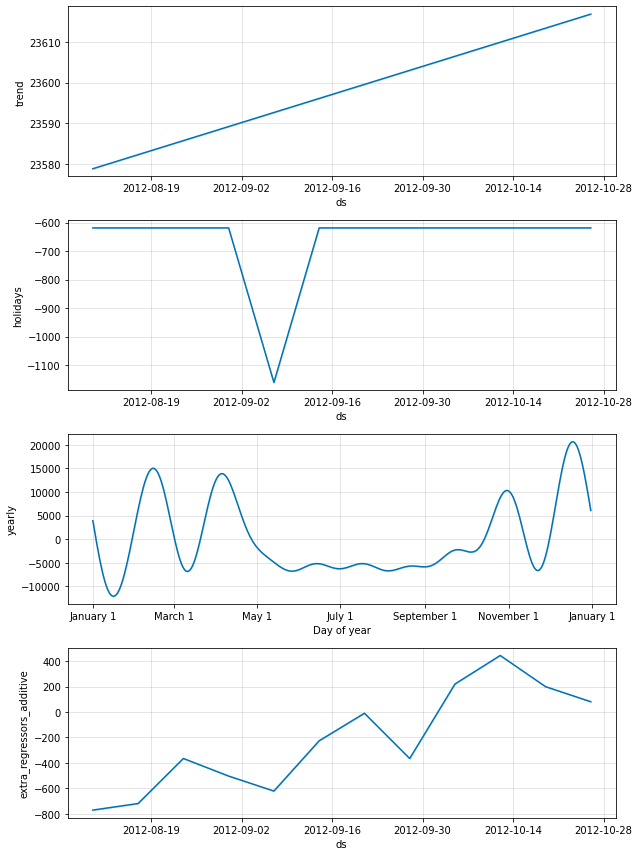

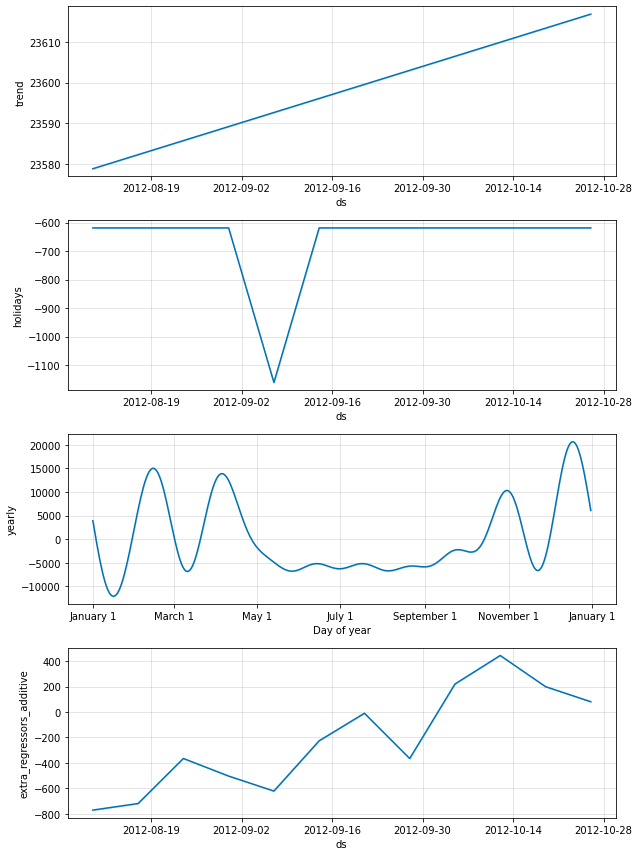

In [157]:
model2.plot_components(forecast)

We can predict sales of each and department stores using profet but data for many stores and department is missing.